In [223]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [224]:
what_is_this = pd.read_csv('pred_with_labels/what_is_this.csv', delimiter=';')
what_is_this['std'] = what_is_this.groupby('Region')['Confidence'].transform('std')
# create pandas dataframe with columns 'Region', 'Confidence', 'std'
# 'std' is the standard deviation of the confidence for each region
what_is_this_filtered = what_is_this.drop_duplicates(subset=['Region'])
# drop duplicates
what_is_this_filtered = what_is_this_filtered.sort_values(by=['std'], ascending=True)
# sort by region
what_is_this_filtered = what_is_this_filtered.reset_index(drop=True)
# drop columns: Location, Answer, Y_TRUE
# order of columns: Question, Region, Confidence, std
what_is_this_filtered = what_is_this_filtered[['Question', 'Region', 'Confidence', 'std']]

In [225]:
what_is_the_name_of_this = pd.read_csv('pred_with_labels/what_is_the_name_of_this.csv', delimiter=';')
what_is_the_name_of_this['std'] = what_is_the_name_of_this.groupby('Region')['Confidence'].transform('std')
# create pandas dataframe with columns 'Region', 'Confidence', 'std'
# 'std' is the standard deviation of the confidence for each region
what_is_the_name_of_this_filtered = what_is_the_name_of_this.drop_duplicates(subset=['Region'])
# drop duplicates
what_is_the_name_of_this_filtered = what_is_the_name_of_this_filtered.sort_values(by=['std'], ascending=True)
# sort by region
what_is_the_name_of_this_filtered = what_is_the_name_of_this_filtered.reset_index(drop=True)
# drop columns: Location, Answer, Y_TRUE
# order of columns: Question, Region, Confidence, std
what_is_the_name_of_this_filtered = what_is_the_name_of_this_filtered[['Question', 'Region', 'Confidence', 'std']]

In [226]:
what_is_this_famous_for = pd.read_csv('pred_with_labels/what_is_this_famous_for.csv', delimiter=',')
what_is_this_famous_for['std'] = what_is_this_famous_for.groupby('Region')['Confidence'].transform('std')
# create pandas dataframe with columns 'Region', 'Confidence', 'std'
# 'std' is the standard deviation of the confidence for each region
what_is_this_famous_for_filtered = what_is_this_famous_for.drop_duplicates(subset=['Region'])
# drop duplicates
what_is_this_famous_for_filtered = what_is_this_famous_for_filtered.sort_values(by=['std'], ascending=True)
# sort by region
what_is_this_famous_for_filtered = what_is_this_famous_for_filtered.reset_index(drop=True)
# drop columns: Location, Answer, Y_TRUE
# order of columns: Question, Region, Confidence, std
what_is_this_famous_for_filtered = what_is_this_famous_for_filtered[['Question', 'Region', 'Confidence', 'std']]

In [227]:
what_is_this_famous_for_filtered

,Question,Region,Confidence,std
0,What is this famous for?,Switzerland,0.3968,0.204771
1,What is this famous for?,Grisons,0.5272,0.250972
2,What is this famous for?,International,0.2709,0.282091


In [228]:
what_are_activities_here = pd.read_csv('pred_with_labels/what_are_activities_here.csv', delimiter=',')
what_are_activities_here['std'] = what_are_activities_here.groupby('Region')['Confidence'].transform('std')
# create pandas dataframe with columns 'Region', 'Confidence', 'std'
# 'std' is the standard deviation of the confidence for each region
what_are_activities_here_filtered = what_are_activities_here.drop_duplicates(subset=['Region'])
# drop duplicates
what_are_activities_here_filtered = what_are_activities_here_filtered.sort_values(by=['std'], ascending=True)
# sort by region
what_are_activities_here_filtered = what_are_activities_here_filtered.reset_index(drop=True)
# drop columns: Location, Answer, Y_TRUE
# order of columns: Question, Region, Confidence, std
what_are_activities_here_filtered = what_are_activities_here_filtered[['Question', 'Region', 'Confidence', 'std']]

In [229]:
what_are_activities_here_filtered

,Question,Region,Confidence,std
0,What are activities here?,International,0.3592,0.155975
1,What are activities here?,Switzerland,0.4065,0.249313
2,What are activities here?,Grisons,0.2458,0.250435


In [230]:
# merge dataframes
questions = pd.concat([what_is_this_filtered, what_is_the_name_of_this_filtered, what_is_this_famous_for_filtered, what_are_activities_here_filtered])

In [231]:
print(questions.to_latex())

\begin{tabular}{lllrr}
\toprule
 & Question & Region & Confidence & std \\
\midrule
0 & What is this? & International & 0.790000 & 0.224134 \\
1 & What is this? & Switzerland & 0.956200 & 0.258359 \\
2 & What is this? & Grisons & 0.877500 & 0.276312 \\
0 & What is the name of this & International & 0.457800 & 0.247365 \\
1 & What is the name of this & Switzerland & 0.868600 & 0.270750 \\
2 & What is the name of this & Grisons & 0.718200 & 0.285438 \\
0 & What is this famous for? & Switzerland & 0.396800 & 0.204771 \\
1 & What is this famous for? & Grisons & 0.527200 & 0.250972 \\
2 & What is this famous for? & International & 0.270900 & 0.282091 \\
0 & What are activities here? & International & 0.359200 & 0.155975 \\
1 & What are activities here? & Switzerland & 0.406500 & 0.249313 \\
2 & What are activities here? & Grisons & 0.245800 & 0.250435 \\
\bottomrule
\end{tabular}



In [232]:
what_is_this

,Question,Location,Answer,Confidence,Region,Y_TRUE,std
0,What is this?,Matterhorn,mountain,0.9562,Switzerland,mountain,0.258359
1,What is this?,Bundeshaus,building,0.6159,Switzerland,building,0.258359
2,What is this?,Chateau de Chillon,castle,0.9067,Switzerland,castle,0.258359
3,What is this?,Creux du Van,bridge,0.9412,Switzerland,cirque,0.258359
4,What is this?,Bern Old City,bridge,0.1470,Switzerland,city,0.258359
5,What is this?,Jungfraujoch,mountain,0.8022,Switzerland,mountain,0.258359
6,What is this?,Kapellbrücke,bridge,0.6213,Switzerland,bridge,0.258359
7,What is this?,Ascona,beach,0.5799,Switzerland,dock,0.258359
8,What is this?,Grindelwald,ski resort,0.5198,Switzerland,ski resort,0.258359
9,What is this?,Chateau de Gruyeres,castle,0.8702,Switzerland,castle,0.258359


In [233]:
# Create workcloud for each question and each region. Create a 3x3 plot with all wordclouds. Use 'Answer'


# get all answers for 'what is this' and region 'international'
keywords = what_is_this[(what_is_this['Region'] == 'International')]['Answer'].tolist()
print(keywords)

# Combine keywords into a single string
keywords_text = ' '.join(keywords)

# Create a WordCloud object
wordcloud_what_is_this_international = WordCloud(width=800, height=400, background_color='white', colormap='Blues', random_state=42).generate(keywords_text)

['tower', 'mountain', 'building', 'statue', 'building', 'water', 'clock tower', 'china', 'bridge', 'city', 'church', 'building', 'castle', 'boat', 'mountain', 'church', 'statue', 'bridge', 'mountains', 'city']


In [234]:
# Create workcloud for each question and each region. Create a 3x3 plot with all wordclouds. Use 'Answer'


# get all answers for 'what is this' and region 'international'
keywords = what_is_this[(what_is_this['Region'] == 'Switzerland')]['Answer'].tolist()
print(keywords)

# Combine keywords into a single string
keywords_text = ' '.join(keywords)

# Create a WordCloud object
wordcloud_what_is_this_switzerland = WordCloud(width=800, height=400, background_color='white', colormap='Reds', random_state=35).generate(keywords_text)

['mountain', 'building', 'castle', 'bridge', 'bridge', 'mountain', 'bridge', 'beach', 'ski resort', 'castle', 'mountains', 'mountains', 'bridge', 'ski resort', 'oven', 'mountain', 'house', 'clock tower', 'water', 'clock tower']


In [235]:
# Create workcloud for each question and each region. Create a 3x3 plot with all wordclouds. Use 'Answer'


# get all answers for 'what is this' and region 'international'
keywords = what_is_this[(what_is_this['Region'] == 'Grisons')]['Answer'].tolist()
print(keywords)

# Combine keywords into a single string
keywords_text = ' '.join(keywords)

# Create a WordCloud object
wordcloud_what_is_this_grisons = WordCloud(width=800, height=400, background_color='white', colormap='Greens', random_state=42).generate(keywords_text)

['lake', 'street', 'lake', 'mountain', 'bridge', 'bridge', 'train', 'city', 'kites', 'city', 'snow', 'horses', 'kite', 'train', 'mountains', 'trees', 'train', 'mountains', 'clock tower', 'ski lift']


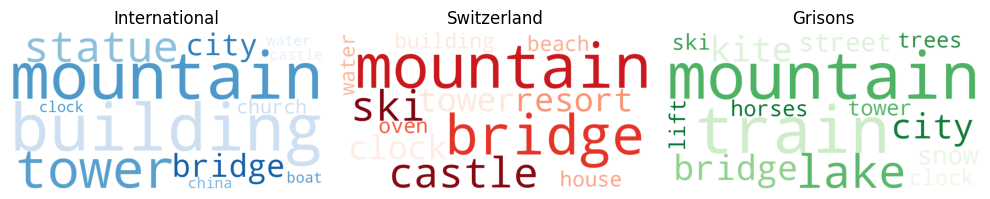

In [236]:
# create subplots 3x1 with wordclouds
fig, axs = plt.subplots(1, 3, figsize=(10, 10))
axs[0].imshow(wordcloud_what_is_this_international)
axs[0].set_title('International')
axs[0].axis('off')
axs[1].imshow(wordcloud_what_is_this_switzerland)
axs[1].set_title('Switzerland')
axs[1].axis('off')
axs[2].imshow(wordcloud_what_is_this_grisons)
axs[2].set_title('Grisons')
axs[2].axis('off')
plt.tight_layout()
plt.show()

In [237]:
answers = pd.concat([what_is_this, what_is_the_name_of_this, what_is_this_famous_for, what_are_activities_here])

In [238]:
answers["Answer"].value_counts()

Answer
mountains    26
water        20
bridge       18
mountain     16
train        15
             ..
wall          1
store         1
clock         1
snow          1
grazing       1
Name: count, Length: 62, dtype: int64

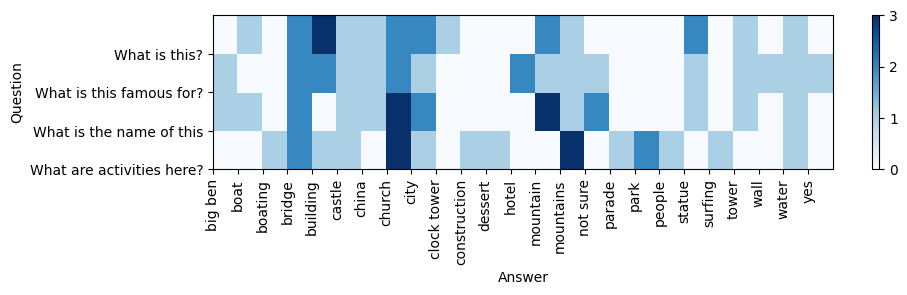

In [239]:
# heatmap for answers and questions
answers_international = answers[(answers['Region'] == 'International')]
answers_switzerland = answers[(answers['Region'] == 'Switzerland')]
answers_grisons = answers[(answers['Region'] == 'Grisons')]
# create pivot table
heatmap = answers_international.pivot_table(index='Question', columns='Answer', aggfunc='size', fill_value=0)
# plot heatmap
plt.figure(figsize=(10, 2))
plt.pcolor(heatmap, cmap='Blues')
plt.yticks(range(len(heatmap.index)), heatmap.index)
plt.xticks(range(len(heatmap.columns)), heatmap.columns, rotation=90)
plt.xlabel('Answer')
plt.ylabel('Question')
plt.colorbar()
plt.show()


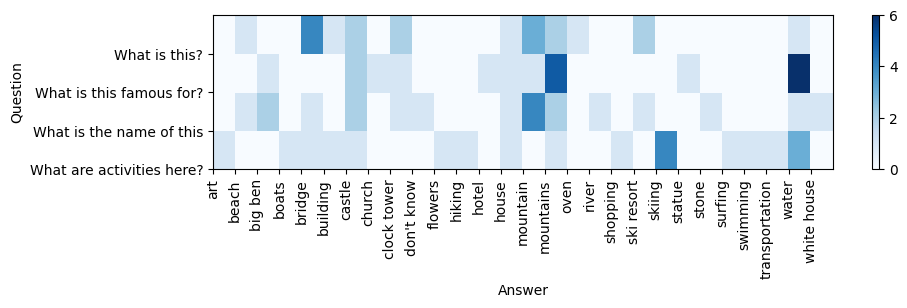

In [240]:
# heatmap for answers and questions
answers_international = answers[(answers['Region'] == 'International')]
answers_switzerland = answers[(answers['Region'] == 'Switzerland')]
answers_grisons = answers[(answers['Region'] == 'Grisons')]
# create pivot table
heatmap = answers_switzerland.pivot_table(index='Question', columns='Answer', aggfunc='size', fill_value=0)
# plot heatmap
plt.figure(figsize=(10, 2))
plt.pcolor(heatmap, cmap='Blues')
plt.yticks(range(len(heatmap.index)), heatmap.index)
plt.xticks(range(len(heatmap.columns)), heatmap.columns, rotation=90)
plt.xlabel('Answer')
plt.ylabel('Question')
plt.colorbar()
plt.show()


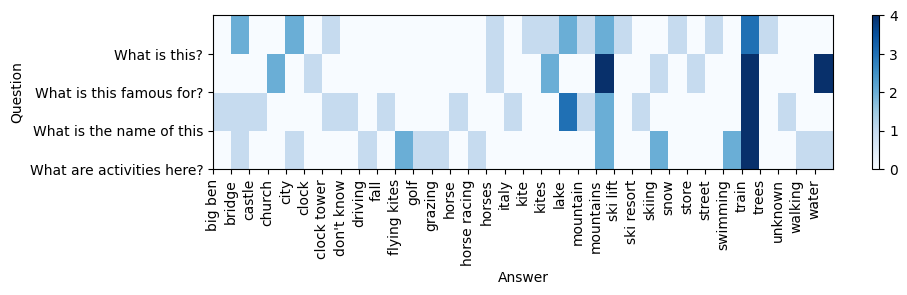

In [241]:
# heatmap for answers and questions
answers_international = answers[(answers['Region'] == 'International')]
answers_switzerland = answers[(answers['Region'] == 'Switzerland')]
answers_grisons = answers[(answers['Region'] == 'Grisons')]
# create pivot table
heatmap = answers_grisons.pivot_table(index='Question', columns='Answer', aggfunc='size', fill_value=0)
# plot heatmap
plt.figure(figsize=(10, 2))
plt.pcolor(heatmap, cmap='Blues')
plt.yticks(range(len(heatmap.index)), heatmap.index)
plt.xticks(range(len(heatmap.columns)), heatmap.columns, rotation=90)
plt.xlabel('Answer')
plt.ylabel('Question')
plt.colorbar()
plt.show()


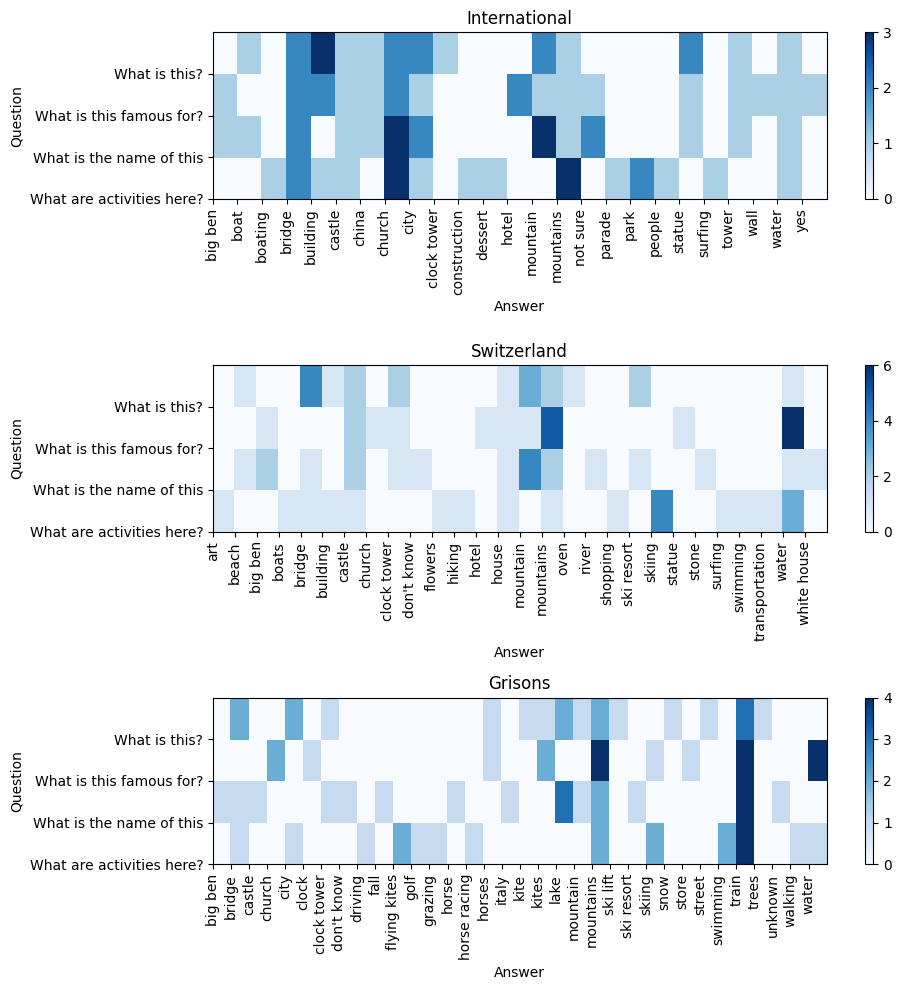

In [242]:
# show all heatmaps in one plot
# create pivot table
heatmap_international = answers_international.pivot_table(index='Question', columns='Answer', aggfunc='size', fill_value=0)
# create pivot table
heatmap_switzerland = answers_switzerland.pivot_table(index='Question', columns='Answer', aggfunc='size', fill_value=0)
# create pivot table
heatmap_grisons = answers_grisons.pivot_table(index='Question', columns='Answer', aggfunc='size', fill_value=0)
# plot heatmap
plt.figure(figsize=(10, 10))
plt.subplot(3, 1, 1)
plt.pcolor(heatmap_international, cmap='Blues')
plt.yticks(range(len(heatmap_international.index)), heatmap_international.index)
plt.xticks(range(len(heatmap_international.columns)), heatmap_international.columns, rotation=90)
plt.xlabel('Answer')
plt.ylabel('Question')
plt.title('International')
plt.colorbar()
plt.subplot(3, 1, 2)
plt.pcolor(heatmap_switzerland, cmap='Blues')
plt.yticks(range(len(heatmap_switzerland.index)), heatmap_switzerland.index)
plt.xticks(range(len(heatmap_switzerland.columns)), heatmap_switzerland.columns, rotation=90)
plt.xlabel('Answer')
plt.ylabel('Question')
plt.title('Switzerland')
plt.colorbar()
plt.subplot(3, 1, 3)
plt.pcolor(heatmap_grisons, cmap='Blues')
plt.yticks(range(len(heatmap_grisons.index)), heatmap_grisons.index)
plt.xticks(range(len(heatmap_grisons.columns)), heatmap_grisons.columns, rotation=90)
plt.xlabel('Answer')
plt.ylabel('Question')
plt.title('Grisons')
plt.colorbar()
plt.tight_layout()
plt.show()
